# Database Sources & Links

## UniProt - protein dataset
- PUBMED LINK (https://pubmed.ncbi.nlm.nih.gov/33237286/)
- DATABASE LINK (https://beta.uniprot.org/)
- **Used.**

## VenomKB - a centralized resource for discovering therapeutic uses for animal venoms and venom compounds
- PUBMED LINK (https://www.biorxiv.org/content/10.1101/295204v1.full)
- DATABASE LINK (http://venomkb.org/)
- **Used.**

## DPL - a comprehensive database on sequences, structures, sources, and functions of peptide ligands.
- PUBMED LINK (https://pubmed.ncbi.nlm.nih.gov/33216893/)
- DATABASE LINK (http://www.peptide-ligand.cn/index.php/category/home/)
- **NOTE**: Note, data is duplicated from CAMP3R and APD3 datasets, collected already. Didn't use.

## APD3 - the updated antimicrobial peptide database and its application in peptide design
- PUBMED LINK (https://pubmed.ncbi.nlm.nih.gov/18957441/)
- DATABASE LINK (https://aps.unmc.edu/downloads)
- **Used.**

## PepBank - a database of peptides based on sequence text mining and public peptide data sources
- PUBMED LINK (https://pubmed.ncbi.nlm.nih.gov/17678535/)
- DATABASE LINK (http://pepbank.mgh.harvard.edu/)
- **NOTE**: Duplicate data from UniProtKB.

## FermFooDb - a database of bioactive peptides derived from fermented foods
- PUBMED LINK (https://pubmed.ncbi.nlm.nih.gov/33898816/)
- DATABASE LINK (https://webs.iiitd.edu.in/raghava/fermfoodb/index.php)
- **Used.** 

## PlantAFP - a curated database of plant-origin antifungal peptides
- PUBMED LINK (https://pubmed.ncbi.nlm.nih.gov/31612325/)
- DATABASE LINK (http://bioinformatics.cimap.res.in/sharma/PlantAFP/)
- **NOTE**: Lots of sequence data is actually missing, can't be really used.

## DBETH - a database of bacterial exotoxins for human
- PUBMED LINK (https://pubmed.ncbi.nlm.nih.gov/22102573/)
- DATABASE LINK (http://www.hpppi.iicb.res.in/btox/)
- **Used.**

## THPdb - database of FDA approved peptide and protein therapeutics
- PUBMED LINK (https://pubmed.ncbi.nlm.nih.gov/28759605/)
- DATABASE LINK (https://webs.iiitd.edu.in/raghava/thpdb/)
- **Used.**

## PepTherDia - database and structural composition analysis of approved peptide therapeutics and diagnostics
- PUBMED LINK (https://pubmed.ncbi.nlm.nih.gov/33647438/)
- DATABASE LINK (http://peptherdia.herokuapp.com)
- **Used.**

## PlantPepDB - a manually curated plant peptide database
- PUBMED LINK (https://pubmed.ncbi.nlm.nih.gov/32042035/)
- DATABASE LINK (http://www.nipgr.ac.in/PlantPepDB/)
- **Used.**

## ConoServer - a database for conopeptides
- PUBMED LINK (https://pubmed.ncbi.nlm.nih.gov/18065428/)
- DATABASE LINK (http://www.conoserver.org/)
- **Used.**

## ISOB - a database of indigenous snake species of Bangladesh with respective known venom composition
- PUBMED LINK (https://pubmed.ncbi.nlm.nih.gov/25848172/)
- DATABASE LINK (http://www.snakebd.com/)
- **Used.**
 
 ## T3DB Database - a database of toxic proteins and compounds for humans
 - PUBMED LINK (https://pubmed.ncbi.nlm.nih.gov/25378312/)
 - DATABASE LINK (http://www.t3db.ca/)
 - **NOTE**: All duplicates of UniProt

# UniProt Database - All Toxins

In [39]:
from bs4 import BeautifulSoup
from io import StringIO
import requests
import pandas as pd
import numpy as np
import json

In [2]:
uniprot_toxin_kw = [
    "0008",
    "0108",
    "0123",
    "0204",
    "0260",
    "0528",
    "0629",
    "0632",
    "0638",
    "0738",
    "0766",
    "0800",
    "0843",
    "0870",
    "0872",
    "0959",
    "1052",
    "1053",
    "1061",
    "1199",
    "1200",
    "1201",
    "1202",
    "1203",
    "1204",
    "1205",
    "1206",
    "1213",
    "1214",
    "1216",
    "1217",
    "1218",
    "1219",
    "1220",
    "1221",
    "1222",
    "1255",
    "1265",
    "1266",
    "1275",
    "0878",
]
uniprot_toxin_kw = ["KW-" + x for x in uniprot_toxin_kw]

In [71]:
# Reviewed Frames
uniprot_reviewed_frames = []

for toxin_kw in uniprot_toxin_kw:
    init_kw_url = f'https://rest.uniprot.org/uniprotkb/search?query=keyword:{toxin_kw}+AND+reviewed:true&format=tsv&fields=id,protein_name,sequence&size=500'
    kw_req = requests.get(init_kw_url)

    while 'Link' in kw_req.headers:
        kw_stringio = StringIO(kw_req.text)
        df = pd.read_csv(kw_stringio, sep='\t')
        uniprot_reviewed_frames += [df]
        kw_next_url = kw_req.headers['Link']
        kw_next_url = kw_next_url[1:kw_next_url.rfind('>')]
        kw_req = requests.get(kw_next_url)
    
    final_kw_stringio = StringIO(kw_req.text)
    df = pd.read_csv(final_kw_stringio, sep='\t')
    uniprot_reviewed_frames += [df]
    
uniprot_all_rev = pd.concat(uniprot_reviewed_frames)

In [72]:
# Unreviewed Frames
uniprot_unreviewed_frames = []

for toxin_kw in uniprot_toxin_kw:
    init_kw_url = f'https://rest.uniprot.org/uniprotkb/search?query=keyword:{toxin_kw}+AND+reviewed:false&format=tsv&fields=id,protein_name,sequence&size=500'
    kw_req = requests.get(init_kw_url)

    while 'Link' in kw_req.headers:
        kw_stringio = StringIO(kw_req.text)
        df = pd.read_csv(kw_stringio, sep='\t')
        uniprot_unreviewed_frames += [df]
        kw_next_url = kw_req.headers['Link']
        kw_next_url = kw_next_url[1:kw_next_url.rfind('>')]
        kw_req = requests.get(kw_next_url)
    
    final_kw_stringio = StringIO(kw_req.text)
    df = pd.read_csv(final_kw_stringio, sep='\t')
    uniprot_unreviewed_frames += [df]
    
uniprot_all_unrev = pd.concat(uniprot_unreviewed_frames)

In [79]:
# Drop duplicates
uniprot_all_rev = uniprot_all_rev.drop_duplicates(subset='Sequence')
uniprot_all_unrev = uniprot_all_unrev.drop_duplicates(subset='Sequence')

In [86]:
# Write both out
uniprot_all_rev.to_csv('uniprot_manually_annotated.csv.gz', index=False)
uniprot_all_unrev.to_csv('uniprot_auto_annotated.csv.gz', index=False)

# VenomKB

In [74]:
# assume that venomkb_proteins.json is already downloaded
# from this page: http://venomkb.org/download
import pandas as pd

In [83]:
venoms_df = pd.read_json('venomkb_proteins.json')
venoms_df = venoms_df[['name', 'description', 'aa_sequence']]
venoms_df = venoms_df.drop_duplicates(subset='aa_sequence')
venoms_df

,name,description,aa_sequence
0,Thrombin-like enzyme asperase,Snake venom serine protease that clots human p...,MVLIRVLANLLILQLSYAQKSSELVIGGDECNINEHRSLVVLFNSS...
1,Snake venom serine protease,Snake venom serine protease that may act in th...,MVLIRVLANLLILQLSYAQKSSELVIGGDECNINEHRSLALVYITS...
2,Zinc metalloproteinase/disintegrin,Snake venom metalloproteinase: impairs hemosta...,MIEVLLVTICLAVSPYQGSSIILESGNVNDYEVVYPRKVTELPKGA...
3,Cysteine-rich venom protein VAR2,"Blocks ryanodine receptors, and potassium chan...",MILLKLYLTLAAILCQSRGTTSLDLDDLMTTNPEIQNEIINKHNDL...
4,Toxin KTx8,This recombinant toxin inhibits the mammalian ...,MNKVCFVVVLVLFVALAAYVSPIEGVPTGGCPLSDSLCAKYCKSHK...
...,...,...,...
6231,Scolopendra 20566.01 Da toxin,None,XKMSEQGLNAQMKAQIVDLHNXARQGVANGQ
6232,Scolopendra 20528.11 Da toxin,None,XQVVERGLDAKAKAAMLDAHNKARQKVANG
6233,Phospholipase A1 verutoxin-1,Catalyzes the hydrolysis of emulsified phospha...,GLLPKVKLVPEQISFILSTRENR
6234,Conantokin-E,Conantokins inhibit N-methyl-D-aspartate (NMDA...,LLVPLVTFHLILGMGTLDHGGALTERRSADATALKPEPVLLQKSDA...


In [85]:
venoms_df.to_csv('venom_proteins_venomkb.csv', index=False)

# Selenium WebDriver for PlantPeptide

In [187]:
import time
from bs4 import BeautifulSoup
from PIL import Image
import io
import requests
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By

In [193]:
driver.quit()

In [194]:
chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_service = Service('/home/apandit/chromedriver/stable/chromedriver')

driver = webdriver.Chrome(service=chrome_service, options=chrome_options)

In [195]:
driver.get('http://14.139.61.8/PlantPepDB/pages/bro.php#11')
driver.find_element("id", "11").click()
starting_page = driver.current_window_handle
toxic_peptide_elems = driver.find_element(By.ID, "11").find_element(By.XPATH, './..').find_elements(By.TAG_NAME, 'li')
toxic_peptide_elems = [x.find_element(By.TAG_NAME, 'a') for x in toxic_peptide_elems]
toxic_peptide_seqs = []

In [191]:
driver.window_handles

['CDwindow-26655B1B0E2F3DE03CDBB777120F916F']

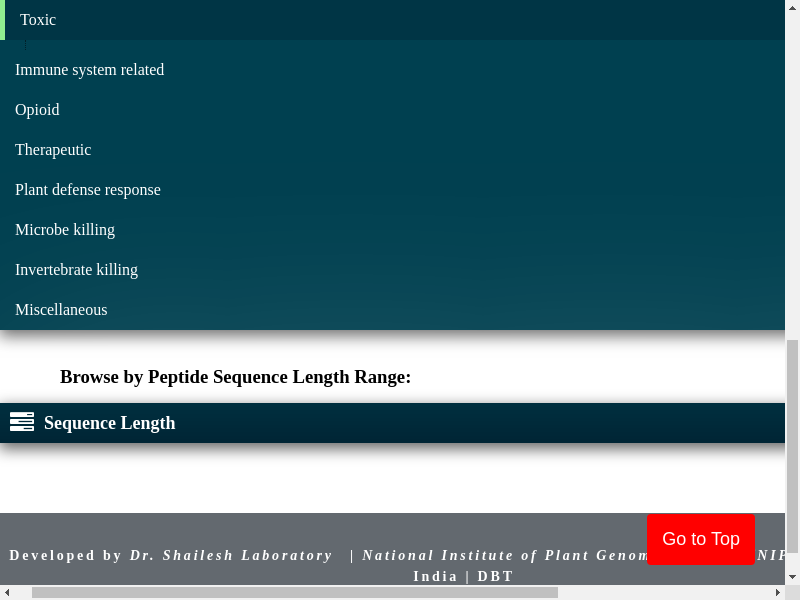

In [168]:
Image.open(io.BytesIO(driver.get_screenshot_as_png()))

In [196]:
for elem in toxic_peptide_elems:
    elem.click()
    time.sleep(1)
    assert len(driver.window_handles) == 2
    elem_window_code = (set(driver.window_handles) - set([starting_page])).pop()
    
    driver.switch_to.window(elem_window_code)
        
    while driver.find_elements(By.CSS_SELECTOR, "ul.pagination a")[-2].get_attribute('href'):
        trs = driver.find_elements(By.CSS_SELECTOR, "table > tbody > tr")[1:]
        for tr in trs:
            td_link = tr.find_elements(By.CSS_SELECTOR, 'td')[0]
            td_link.click()
            time.sleep(1)
                        
            assert len(driver.window_handles) == 3
            seq_window_code = (set(driver.window_handles) - set([starting_page, elem_window_code])).pop()
            
            driver.switch_to.window(seq_window_code)
            seq = driver.find_element(By.CSS_SELECTOR, 'code').text.strip()
            print(seq)
            toxic_peptide_seqs += [seq]
            driver.close()
            driver.switch_to.window(elem_window_code)
        
        driver.switch_to.window(elem_window_code)
        driver.find_elements(By.CSS_SELECTOR, "ul.pagination a")[-2].click()
        time.sleep(1)
        assert len(driver.window_handles) == 2
        elem_window_code = (set(driver.window_handles) - set([starting_page])).pop()
        
    driver.close()
    driver.switch_to.window(starting_page)

KSCCRSTLGRNCYNLCRARGAQKLCAGVCRCKISSGLSCPKGFPK
KSCCKSTLGRNCYNLCRARGAQKLCANVCRCKLTSGLSCPKDFPK
KSCCRSTLGRNCYNLCRVRGAQKLCAGVCRCKLTSSGKCPTGFPK
KSCCPTTAARNQYNICRLPGTPRPVCAALSGCKIISGTGCPPGYRH
KSCCPTTTARNIYNTCRFGGGSRPVCAKLSGCKIISGTKCDSGWNH
KSCCRNTLARNCYNACRFTGGSQPTCGILCDCIHVTTTTCPSSHPS
KSCCPSTTARNIYNTCRLTGASRSVCASLSGCKIISGSTCDSGWNH
GFYPF
GGPFPGY
GIGFYSP
KRDPDWRREQQRREQQRRRREQQQQRRERQQRGERD
KSCCKDTLGRDCYDLCRARGAPKLCSTLCRCKITSGLSCPKDFPK
KSCCKSTLGRDCYDLCRGRGAEKLCAELCRCKITSGLSCPKDFPK
KSCCPNTTGRNIYNACRLTGAPRPTCAKLSGCKIISGSTCPSWPDK
KSCCPNTTGRNIYNTCRLGGGSRERCASLSGCKIISASTCPSYPDK
KSCCPSTTARNIYNTCRLTGTSRPTCASLSGCKIISGSTCDSGWNH
KSCCPSTTGRNIYNTCRLTGSSRETCAKLSGCKIISASTCPSNYPK
KSCCPTTTARNIYNTCRFGGGSRPICAKLSGCKIISGTKCDSGWTH
KSCCPTTTARNIYNTCRFGGGSRPVCAKLSGCKIISGTKCDSGWDH
KSCCPTTTARNIYNYCRFGGGSRPICAKLSGCKIISGTKCDSNGDH
KSCCRDTLGRDCYDLCRSRGAPKLCATLCRCKISSGLSCPKDFPK
KSCCRNTLGRNCYAACRLTGLFSQEQCARLCDCITVTTPTPCPRTHPS
KSCCRNTLGRNCYNGCRFTGGSQPTCGRLCDCIHVTTTTCPSSHPS
MAGSKCGDSWSCEMNYNTECDSCSCGSDCSCGSNCNC
MAGSNCGCGSGCKC

In [197]:
len(toxic_peptide_seqs)

390

In [198]:
from pathlib import Path
finseq = ""
for i, x in enumerate(toxic_peptide_seqs):
    finseq += f'>seq{i}\n' + x + '\n'
of = Path('plantpepdb_seqs.txt')
of.write_text(finseq)

11091

# PepTherDia

In [199]:
import requests
from bs4 import BeautifulSoup

In [204]:
start_drug = 1
end_drug = 111
base_url = 'http://peptherdia.herokuapp.com/drug/'
x = BeautifulSoup(requests.get(base_url + str(start_drug)).text, 'html.parser')
x.select('code')

[<code id="id_10">C1C[C@H]2C(=O)N[C@@H](CSSCCC(=O)N[C@H](C(=O)NCC(=O)N[C@H](C(=O)N[C@H](C(=O)N2C1)CC3=CNC4=CC=CC=C43)CC(=O)O)CCCCN=C(N)N)C(=O)N</code>,
 <code id="id_10">XXGDWPC-NH2</code>]

In [205]:
approved_peptide_drugs = []
for i in range(start_drug, end_drug + 1):
    curr_url = base_url + str(i)
    curr_soup = BeautifulSoup(requests.get(curr_url).text, 'html.parser')
    seq = curr_soup.select('code')[-1].get_text().strip()
    print(seq)
    approved_peptide_drugs += [seq]

XXGDWPC-NH2
CYIQNCPLG-NH2
CYFQNCPRG-NH2
XHWSYlLRP-NHEt
Ac-XXXSXnLXPa-NH2
Dec-WnDTGXDaDGsXX
-
Formyl-VGAlAvVVWlWlWlWX
fPRPGGGGNGDFEEIPEEYL
KLLLLKLLLLKLLLLKLLLLK
SYSMEHFRWGKPVGKKRRPVKVYP
HSDGTFTSELSRLREGARLQRLLQGLV-NH2
Ac-SDAAVDTSSEITTKDLKEKKEVVEEAEN
CSNLSTCVLGKLSQELHKLQTYPRTNTGSGTP-NH2
SPKMVQGSGCFGRKMDRISSSSGLGCKVLRRH
HAEGTFTSDVSSYLEGQAAK(EX)EFIAWLVRGRG
HGDGSFSDEMNTILDNLAARDFINWLIQTKITD
HSQGTFTSDYSKYLDSRRAQDFVQWLMNT
KCNTATCATQRLANFLVHSSNNFGPILPPTNVGSNTY-NH2
SVSEIQLMHNLGKHLNSMERVEWLRKKLQDVHNF
HGEGTFTSDLSKQMEEEAVRLFIEWLKNGGPSSGAPPPS-NH2
Ac-YTSLIHSLIEESQNQQEKNEQELLELDKWASLWNWF
SYSMEHFRWGKPVGKKRRPVKVYPNGAEDESAEAFPLEF
XYADAIFTNSYRKVLGQLSARKLLQDIMSRQQGESNQERGARARL-NH2
XHWSYXLRP-NHEt
CFFQNCPKG-NH2
CYFQNCPXG-NH2
XYFQNCPrG-NH2
GGGCYFQNCPKG-NH2
SNLSTXVLGKLSQELHKLQTYPRTDVGAGTP-NH2
XAP
XHWSYwLRPG-NH2
CGNLSTCMLGTYTQDFNKFHTFPQTAIGVGAP-NH2
XHWSYXLRP-NHNHCONH2
XKP
fCFwKTCX
XHWSYGLRPG-NH2
XHWSYXLRPG-NH2
XHWSYXLRP-NHEt
XCYwKVCT-NH2
SLRRSSCFGGRMDRIGAQSGLGCNSFRY
Ac-XXXSYXLRPa-NH2
Ac-XXXSYXLXPa-NH2
XXITNCPX

In [206]:
finlist = ""
for i, drug in enumerate(approved_peptide_drugs):
    finlist += f">approved_seq{i}\n{drug}\n"
of = Path('peptherdia_approved.txt')
of.write_text(finlist)

3665

# Labeling all the Toxic Proteins & Peptides Across Databases

## Load them all
- UniProt (uniprot_auto_annotated.csv.gz and uniprot_manually_annotated.csv.gz)
- VenomKB (venom_proteins_venomkb.csv)
- DBETH (dbeth_bacterial_exotoxins.fa)
- isob_snake_venoms (isob_fasta_{1 - 15}.txt)
- ConoServer (conoserver_protein.fa)
- PlantPepDB (plantpepdb_seqs.txt)

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from Bio import SeqIO
from pathlib import Path

In [12]:
# uniprot
uniprot_manual_df = pd.read_csv('uniprot_manually_annotated.csv.gz')
uniprot_auto_df = pd.read_csv('uniprot_auto_annotated.csv.gz')
uniprot_seqs = uniprot_auto_df['Sequence'].tolist() + uniprot_manual_df['Sequence'].tolist()

# venomkb
venomkb_df = pd.read_csv('venom_proteins_venomkb.csv')
venomkb_seqs = venomkb_df['aa_sequence'].tolist()

# DBETH
dbeth_seq_records = list(SeqIO.parse('dbeth_bacterial_exotoxins.fa', 'fasta'))
dbeth_seqs = [x.seq for x in dbeth_seq_records]

# ConoServer
conoserver_seq_records = list(SeqIO.parse('conoserver_protein.fa', 'fasta'))
conoserver_seqs = [x.seq for x in conoserver_seq_records]

# PlantPepDb
plantpepdb_records = list(SeqIO.parse('plantpepdb_seqs.txt', 'fasta'))
plantpepdb_seqs = [x.seq for x in plantpepdb_records]

# ISOB Snake Venom
isob_snake_seqs = []
for x in Path('isob_snake_venoms').iterdir():
    if x.is_file() and x.suffix == '.txt':
        x_records = list(SeqIO.parse(x, 'fasta'))
        isob_snake_seqs += [y.seq for y in x_records]

### Note - Acceptable Amino Acids Table

| Letter | Amino Acid |
| :----- | :-------- |
| A | Alanine |
| C | Cysteine |
| D | Aspartic Acid |
| E | Glutamic Acid |
| F | Phenylalanine |
| G | Glycine |
| H | Histidine |
| I | Isoleucine |
| K | Lysine |
| L | Leucine |
| M | Methionine |
| N | Asparagine |
| O | Pyrrolysine |
| P | Proline |
| Q | Glutamine |
| R | Arginine |
| S | Serine |
| T | Threonine |
| U | Selenocysteine |
| V | Valine |
| W | Tryptophan |
| Y | Tyrosine |
| * | Translation Stop |

In [13]:
canonical_set = {'a', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'y', '*'}

In [17]:
all_toxins_set = set(uniprot_seqs + venomkb_seqs + dbeth_seqs + conoserver_seqs + plantpepdb_seqs + isob_snake_seqs)
print(f"All Toxins Initial Length: {len(all_toxins_set)}")
all_toxins_set = {str(x).lower() for x in all_toxins_set if len(x) > 0}
all_toxins_set = {x for x in all_toxins_set if set(x).issubset(canonical_set)}
print(f"All Toxins Final Length: {len(all_toxins_set)}")

All Toxins Initial Length: 212855
All Toxins Final Length: 204724


In [21]:
all_new_toxins_str_a = ""
all_new_toxins_str_b = ""
for i, x in enumerate(all_toxins_set):
    if i < 100000:
        all_new_toxins_str_a += f">seq{i}\n{x}\n"
    else:
        all_new_toxins_str_b += f">seq{i}\n{x}\n"
Path('all_new_toxins_1.fa').write_text(all_new_toxins_str_a)
Path('all_new_toxins_2.fa').write_text(all_new_toxins_str_b)

52189337

# Combined Data with Previous Papers

## Load in ToxDL

In [24]:
from Bio import SeqIO
from pathlib import Path
import os

In [34]:
toxdl_all = list(SeqIO.parse('../toxdl/bacteria1.fa', 'fasta'))
toxdl_all += list(SeqIO.parse('../toxdl/test.fa', 'fasta'))
toxdl_all += list(SeqIO.parse('../toxdl/train.fa', 'fasta'))
toxdl_all += list(SeqIO.parse('../toxdl/valid.fa', 'fasta'))

In [35]:
toxdl_toxin_seqs = [x.seq for x in toxdl_all if x.description.split()[-1] == '1']
len(toxdl_toxin_seqs)

4677

In [64]:
toxdl_neg_seqs = [x.seq for x in toxdl_all if x.description.split()[-1] == '0']
len(toxdl_neg_seqs)

7000

## Load in ToxIBTL

In [66]:
toxibtl_peptides = list(SeqIO.parse('../toxibtl/peptide/peptide.fasta', 'fasta'))
toxibtl_test = list(SeqIO.parse('../toxibtl/protein/test.fa', 'fasta'))
toxibtl_train = list(SeqIO.parse('../toxibtl/protein/train.fa', 'fasta'))
toxibtl_toxin_seqs = [x.seq for x in toxibtl_peptides if not 'non-toxin' in x.description]
toxibtl_neg_seqs = [x.seq for x in toxibtl_peptides if 'non-toxin' in x.description]
print(len(toxibtl_toxin_seqs))
print(len(toxibtl_neg_seqs))
toxibtl_toxin_seqs += [x.seq for x in toxibtl_test if x.description.split()[-1] == '1']
toxibtl_toxin_seqs += [x.seq for x in toxibtl_train if x.description.split()[-1] == '1']
toxibtl_neg_seqs += [x.seq for x in toxibtl_test if x.description.split()[-1] == '0']
toxibtl_neg_seqs += [x.seq for x in toxibtl_train if x.description.split()[-1] == '0']

1932
1932


In [67]:
print(f"ToxIBTL Neg Size: {len(toxibtl_neg_seqs)}")
print(f"ToxIBTL Toxin Size: {len(toxibtl_toxin_seqs)}")

ToxIBTL Neg Size: 8273
ToxIBTL Toxin Size: 6404


## Load in ToxinPred

In [44]:
toxinpred_neg_files = [
    'toxinpred-ind-neg-1.txt',
    'toxinpred-ind-neg-2.txt',
    'toxinpred-main-neg-1.txt',
    'toxinpred-main-neg-2.txt',
]
toxinpred_pos_files = [
    'toxinpred-ind-pos-1.txt',
    'toxinpred-ind-pos-2.txt',
    'toxinpred-main-pos-1.txt',
    'toxinpred-main-pos-2.txt',
]

In [45]:
def load_seqs(path):
    seqs_text = Path(path).read_text()
    seqs = seqs_text.splitlines()
    return seqs

In [47]:
toxinpred_neg_seqs = []
for x in toxinpred_neg_files:
    toxinpred_neg_seqs += load_seqs(f"../toxinpred/{x}")
toxinpred_pos_seqs = []
for x in toxinpred_pos_files:
    toxinpred_pos_seqs += load_seqs(f"../toxinpred/{x}")
print(f"Length ToxinPred Pos: {len(toxinpred_pos_seqs)}")
print(f"Length ToxinPred Neg: {len(toxinpred_neg_seqs)}")

Length ToxinPred Pos: 4216
Length ToxinPred Neg: 17434


## Combine All Positive (Toxin) Samples

In [55]:
canonical_set = {'a', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'y', '*'}

In [60]:
combined_toxin_samples = list(all_toxins_set) + toxdl_toxin_seqs + toxibtl_toxin_seqs + toxinpred_pos_seqs
combined_toxin_samples = set(combined_toxin_samples)
combined_toxin_samples = {str(x).lower() for x in combined_toxin_samples if len(x) > 0}
combined_toxin_samples = {x for x in combined_toxin_samples if set(x).issubset(canonical_set)}
print(f"Combined Toxin Samples Final Length: {len(combined_toxin_samples)}")

Combined Toxin Samples Final Length: 205384


In [61]:
def write_aa_to_fastas(aa_set, outdir, filename='toxin'):
    outstr = ""
    batch = 0
    for i, aa in enumerate(aa_set):
        if i % 80000 == 0 and i > 0:
            outdir_path = Path(f"{outdir}/toxin-{batch}.fasta")
            outdir_path.write_text(outstr)
            outstr = ""
            batch += 1
        outstr += f">toxin {i}\n{aa}\n"
    if outstr != "":
        outdir_path = Path(f"{outdir}/toxin-{batch}.fasta")
        outdir_path.write_text(outstr)
        outstr = ""
        batch += 1

In [62]:
write_aa_to_fastas(combined_toxin_samples, '../combined')

## Combine All Negative (Non-Toxin) Samples

### Loading in Non-Toxic Datasets Too

In [75]:
from Bio import SeqIO
import pandas as pd
import os

In [76]:
os.getcwd()

'/home/apandit/tox/data/new'

In [126]:
anti_microbe_peptides = list(SeqIO.parse('anti_microbial_peptides.fasta', 'fasta'))
bactibase_peptides = list(SeqIO.parse('BACTIBASE.fasta', 'fasta'))
peptherdia_peptides = list(SeqIO.parse('peptherdia_approved.txt', 'fasta'))
thpdb_peptides = list(SeqIO.parse('thpdb_therapeutic_peptides_sequences.fasta', 'fasta'))

In [127]:
anti_microbe_peptides = [str(x.seq).lower() for x in anti_microbe_peptides]
bactibase_peptides = [str(x.seq).lower() for x in bactibase_peptides]
peptherdia_peptides = [str(x.seq).lower() for x in peptherdia_peptides]
thpdb_peptides = [str(x.seq).lower() for x in thpdb_peptides]

In [128]:
fermfood_peptides = []
for x in Path('fermfoodb').iterdir():
    if x.is_file() and x.suffix == '.csv.':
        df = pd.read_csv(x)
        fermfood_peptides += df['Peptide_Sequence'].str.lower().tolist()

campr3_peptides = []
for x in Path('campr3').iterdir():
    if x.is_file() and x.suffix == '.txt':
        df = pd.read_csv(x, sep='\t')
        campr3_peptides += df['Seqence'].str.lower().tolist()

In [131]:
canonical_set = {'a', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'y', '*'}
combined_neg_samples = toxdl_neg_seqs + toxibtl_neg_seqs + toxinpred_neg_seqs
combined_neg_samples += anti_microbe_peptides + bactibase_peptides + peptherdia_peptides + thpdb_peptides
combined_neg_samples += fermfood_peptides + campr3_peptides
combined_neg_samples = [str(x).lower() for x in combined_neg_samples]
combined_neg_samples = [x for x in combined_neg_samples if set(x).issubset(canonical_set)]
combined_neg_samples = set(combined_neg_samples)
print(len(combined_neg_samples))

28315


In [132]:
outstr = ""
for i, x in enumerate(combined_neg_samples):
    outstr += f">nontoxin {i}\n{x}\n"
Path('../combined/nontoxin-0.fasta').write_text(outstr)

3867922